#### Unsupervised Machine Learning - Clustering using K-Means
K-Means clustering is an unsupervised learning tehnique that is suitable for working with unlabelled data that lacks predefined categories or groups. The primary objetive of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data to one of the K group based on the features that are provided.

In [1]:
# import required libraries

# Data analysis libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
data = pd.read_csv(r"C:\Users\hp\Downloads\customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### No missing data in the dataset

In [5]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### The annual income of the customer ranges from 15 - 137(k) while the spending score of the customers ranges from 1 - 99. The ages of the customers ranges from 18 - 70.

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


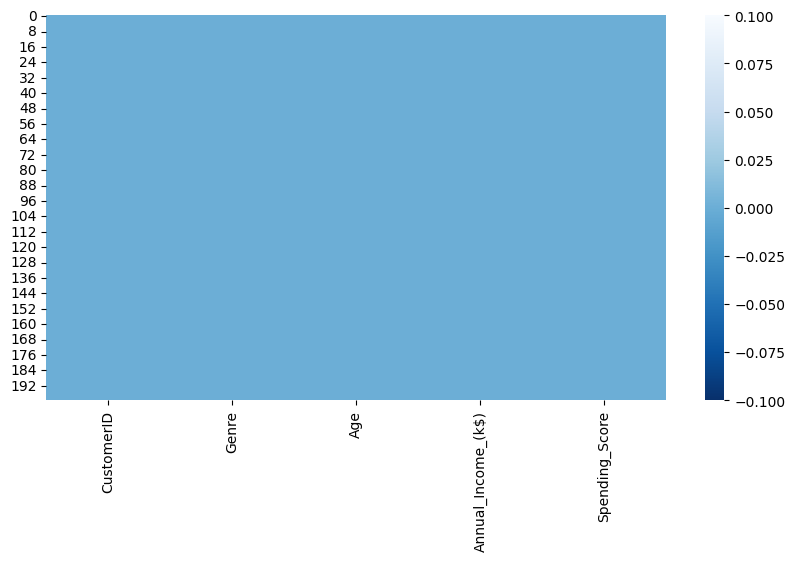

In [6]:
# check for missing values
print(data.isnull().sum())

# visualizing missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r");

### Data cleaning and pre-proessing

In [7]:
# check for duplicates
data.duplicated().sum()

0

#### There are no duplicates in the dataset

### Exploratory data analysis

In [20]:
# Bivariate analysis

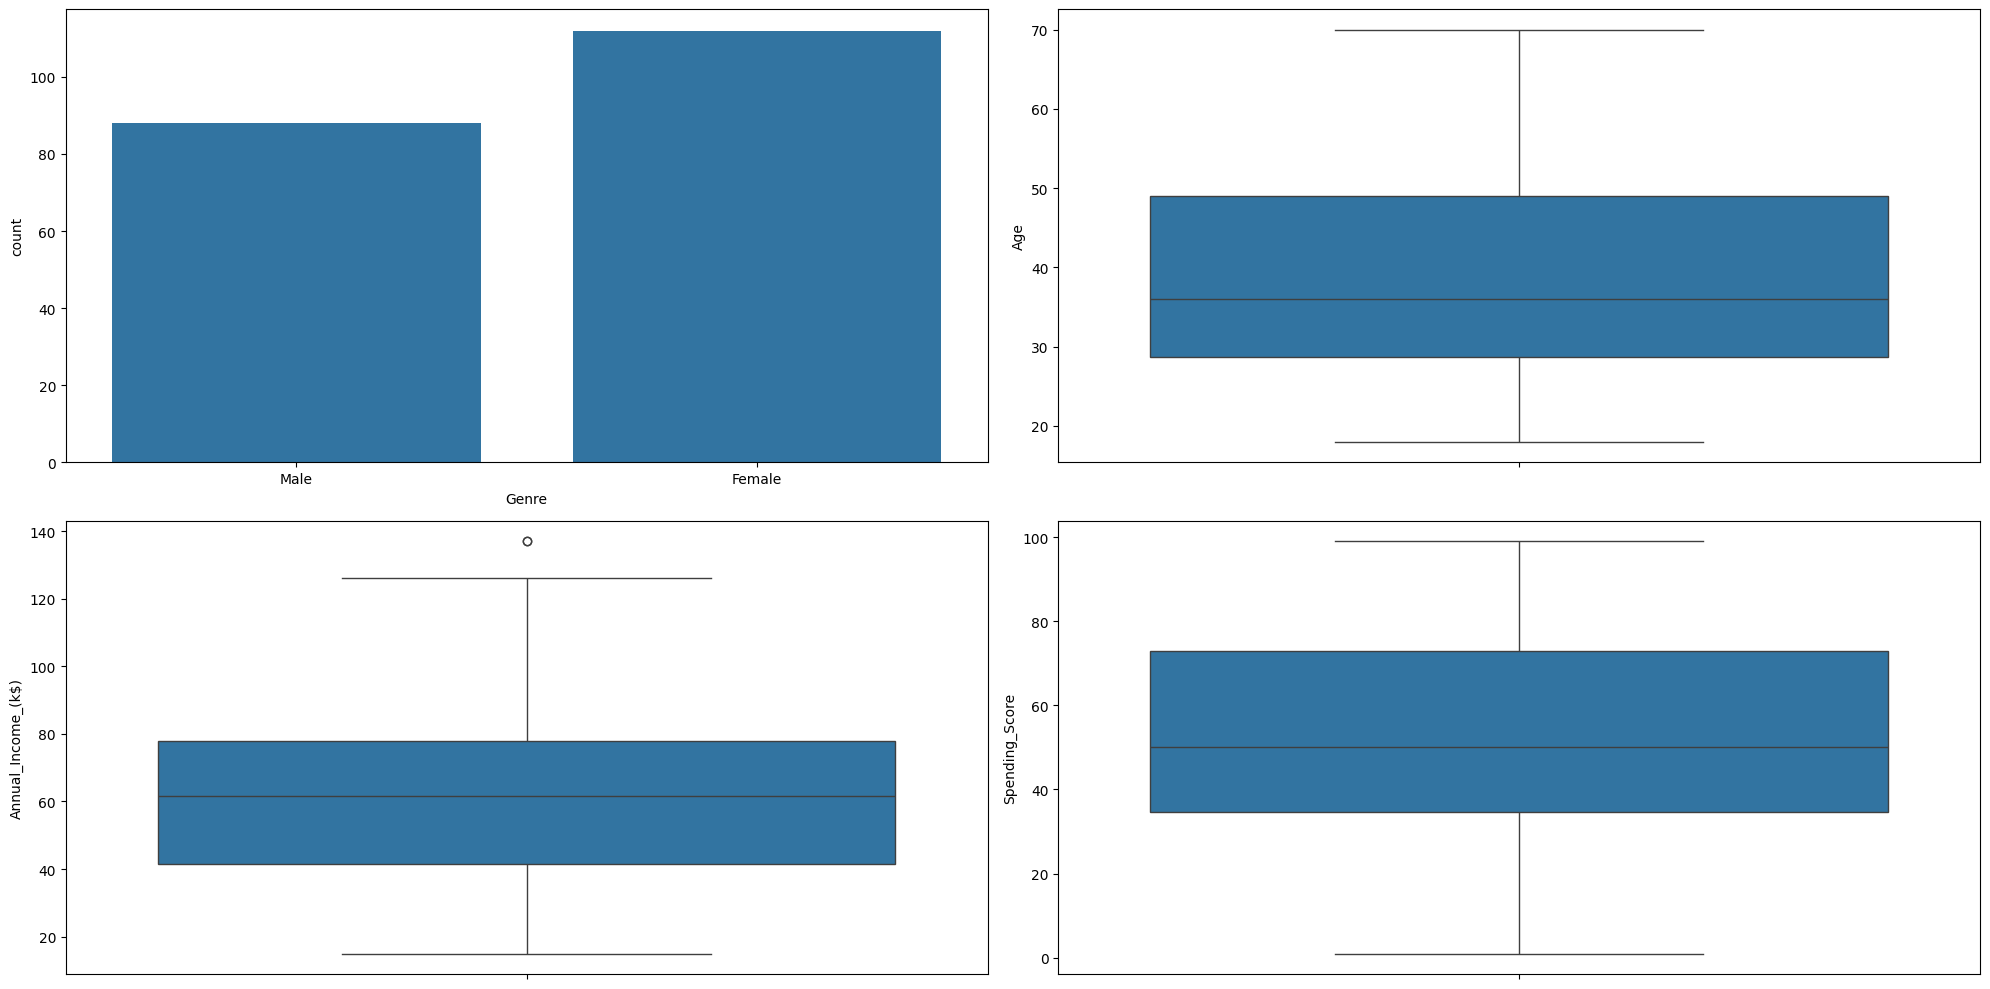

In [8]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
plt1 = sns.countplot(x=data['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout();

#### Observations
- Only the Annual income column have an outlier
- There are more female customers than male customers.

In [34]:
def age_gp(x):
    if x <= 31:
        return '<= 31 Youth'
    elif x <= 44:
        return '32 - 44 Adult'
    elif x <= 57:
        return '45 - 57 Old Adult'
    else:
        return '>= 58 Elder'

data['Age_group'] = data['Age'].apply(age_gp)

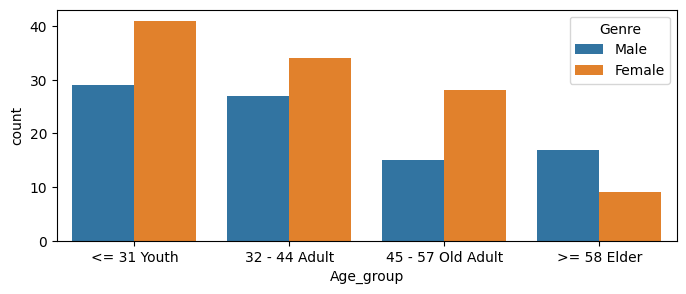

In [45]:
"""
plt.figure(figsize=(5,3))

age_count = data['Age_group'].value_counts(ascending=False)
ax = sns.countplot(y=data['Age_group'], order=age_count.index)
ax.bar_label(container=ax.containers[0], labels=age_count.values)
ax.xaxis.set_ticks([]);
"""

plt.figure(figsize=(8,3))

age_count = data['Age_group'].value_counts(ascending=False)
sns.countplot(x=data['Age_group'], order=age_count.index, hue=data['Genre']);

#### Observations
- As the customers age increases, they tend to make less purchases.
- All age group except the Elder age group have more female customers.

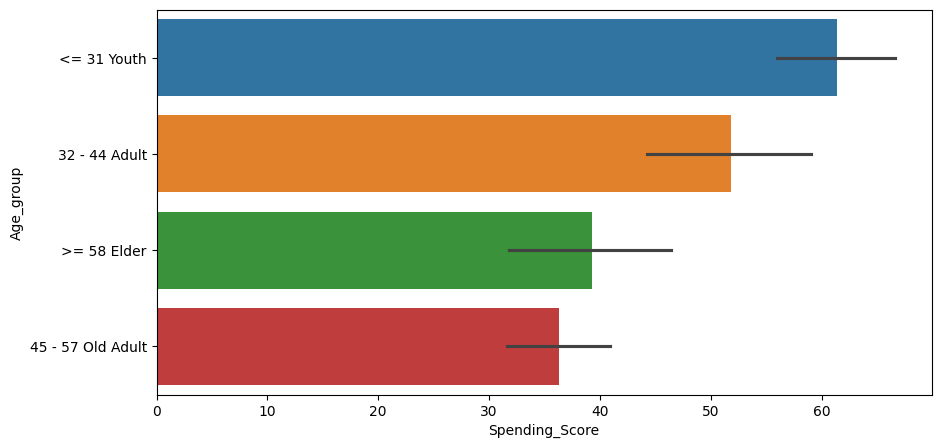

In [57]:
# Bivariate analysis

# which agegroup spends more
plt.figure(figsize=(10,5))

ax = sns.barplot(x=data['Spending_Score'], y=data['Age_group'], hue=data['Age_group']);

#### The youth age group have the highest spending score while the old adult have the lowest spending score. Suprisingly, the elder age group do not have the lowest spending sore but rather they have the second least spending score.

In [10]:
# multivariate analysis

In [49]:
def gender(x):
    if x == 'Male':
        return 1
    else:
        return 0

data['Gender'] = data['Genre'].apply(gender)
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster,Age_group,Gender
0,1,Male,19,15,39,0,<= 31 Youth,1
1,2,Male,21,15,81,4,<= 31 Youth,1
2,3,Female,20,16,6,0,<= 31 Youth,0
3,4,Female,23,16,77,4,<= 31 Youth,0
4,5,Female,31,17,40,0,<= 31 Youth,0


In [53]:
data_num = data[['Gender','Age','Annual_Income_(k$)','Spending_Score']]

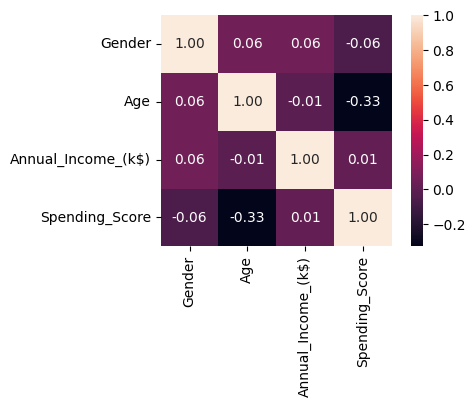

In [52]:
# correlation between numerical features
plt.figure(figsize=(5,3))

sns.heatmap(data_num.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10});

#### The spending score feature only has a positive correlation (weak) with the annual income.

In [61]:
# Feature engineering / data pre-processing

In [62]:
# convert categorial columns to numerical columns

from sklearn.preprocessing import LabelEncoder

#label encoding
encoder = LabelEncoder()  # method initialize

# looping through the columns in the dataset
df = data.copy()
for c in df.columns[1:]:
    if(df[c].dtype == 'object'):
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]

In [63]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster,Age_group,Gender
0,1,1,19,15,39,0,2,1
1,2,1,21,15,81,4,2,1
2,3,0,20,16,6,0,2,0
3,4,0,23,16,77,4,2,0
4,5,0,31,17,40,0,2,0


In [66]:
# drop unique identifier columns
df.drop(['Gender'], axis=1, inplace=True)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster,Age_group
0,1,19,15,39,0,2
1,1,21,15,81,4,2
2,0,20,16,6,0,2
3,0,23,16,77,4,2
4,0,31,17,40,0,2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Genre               200 non-null    int32
 1   Age                 200 non-null    int64
 2   Annual_Income_(k$)  200 non-null    int64
 3   Spending_Score      200 non-null    int64
 4   Cluster             200 non-null    int32
 5   Age_group           200 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 7.2 KB


- After applying the K-Means algorithm, we can determine the optimal number of lusters by using the Elbow method. This method involves plotting the Within Cluster Sum of Squares (WCSS) against the number of lusters (K) and selecting the value of k, where the rate of decrease in WCSS slows down signifiantly.

In [15]:
pip install --upgrade threadpoolctl==3.1.0

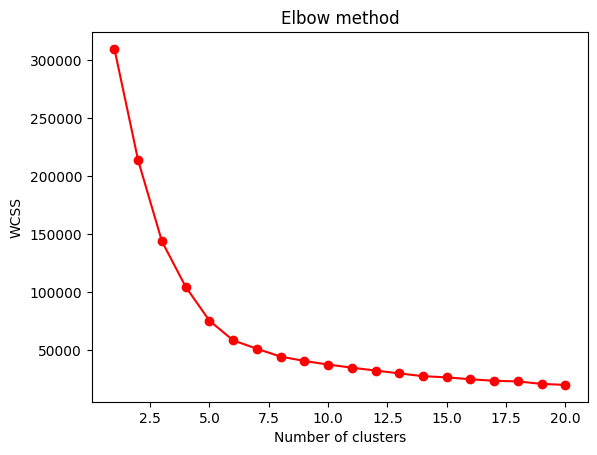

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss, color='red', marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [ ]:
df.columns

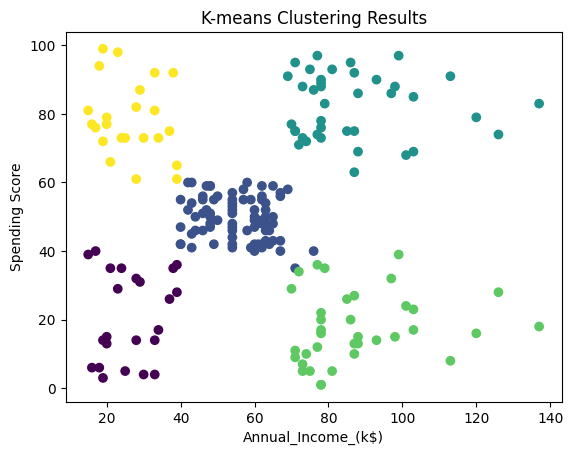

Silhouette Score: 0.44410421380749016


In [69]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

# Visualize cluster results
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending Score')
plt.title('K-means Clustering Results')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette);

#### Observations
- There is a cluster of points in the bottom left corner of the chart, representing customers with a low annual income and a high spending score. A significant amount of clusters is also seen at thebottom left corner of the chart, representing customers with a low annual income and a low spending score.
- There is also a cluster of points in the top right corner of the chart, representing customers with a high annual income and a high spending score. A significant amount of clusters is also seen at the bottom right corner of the chart, representing customers with a high annual income and a low spending score.
- There is also a cluster at the middle indicating middle income customers with middle spending score.

#### Overall the model divided the customers into 5 segments